<a href="https://colab.research.google.com/github/leonunesbs/analise_higiene_pessoal/blob/main/analise_higiene_pessoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataAnalysis Higiêne Pessoal Essencial
## Abaixo será realizada a análise de dados, coletados por Google Forms, guidada por questionamentos pré-definidos abaixo.

---

1. Quais e quantos produtos as mulheres mais consomem em cada faixa de renda?

2. Quais e quantos produtos os homens mais consomem em cada faixa de renda?

3. Qual a média de idade do estudo

4. Quais produtos as mulheres mais consomem de forma geral?

5. Quais produtos os homens mais consomem de forma geral?

---


Desenvolvido por Leonardo Nunes
* https://leonunesbs.vercel.app
* https://instagram.com/leonunesbs





## Preparação

### Importação das bibliotecas necessárias

In [37]:
from collections import Counter, OrderedDict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregando os dados

In [38]:
# Carrega os dados do arquivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/leonunesbs/analise_higiene_pessoal/main/higiene_pessoal.csv?token=AG5IHQJBV62TTDJHURMPMKDALOOH6')


In [39]:
# Mostra os 5 primeiros dados
df.head()

,Carimbo de data/hora,Nome,Idade,"Como você se identifica? (Devido ao objeto da pesquisa, precisamos considerar apenas os gêneros ""homem"" e ""mulher"", marque aquele com o qual você se identifica.)",Assinale os produtos de higiene pessoal que você considera como essenciais,Qual a sua faixa de renda bruta?
0,15/03/2021 09:57:37,Melissa,21,Mulher,"Sabonete, Desodorante, Creme dental, Shampoo, ...",Mais de 5 salários mínimos
1,15/03/2021 09:57:57,Edison Antônio Fernandes,41,Homem,"Sabonete, Desodorante, Creme dental, Perfume, ...",Mais de 5 salários mínimos
2,15/03/2021 09:58:15,Flavia da Silva Melo,36,Mulher,"Sabonete, Desodorante, Creme dental, Perfume, ...",De 1 a 3 salários mínimos
3,15/03/2021 10:02:29,Ana Clara,22,Mulher,"Sabonete, Desodorante, Creme dental, Perfume, ...",De 3 a 5 salários mínimos
4,15/03/2021 10:05:11,Alícia,22,Mulher,"Sabonete, Desodorante, Creme dental, Shampoo, ...",De 1 a 3 salários mínimos


### Normalizando os dados

In [40]:
# Renomeia as colunas
df.columns = ['data_hora', 'nome', 'idade', 'genero', 'produtos', 'renda']

# Descarta as colunas 'data_hora' e 'nome'
df = df.drop(columns=['data_hora', 'nome'])

# Converte os valores da coluna produtos para uma lista de produtos
df['produtos'] = pd.Series(df['produtos'].str.split(', '))

# Ajustando Dummies do DataFrame e formatando o nome das colunas
df = pd.get_dummies(df, columns=['genero', 'renda'])
df.columns = ['idade', 'produtos', 'genero_Homem', 'genero_Mulher',
       'genero_Não-Binarie', 'renda_1a3',
       'renda_3a5', 'renda_5']

In [41]:
df.head()

,idade,produtos,genero_Homem,genero_Mulher,genero_Não-Binarie,renda_1a3,renda_3a5,renda_5
0,21,"[Sabonete, Desodorante, Creme dental, Shampoo,...",0,1,0,0,0,1
1,41,"[Sabonete, Desodorante, Creme dental, Perfume,...",1,0,0,0,0,1
2,36,"[Sabonete, Desodorante, Creme dental, Perfume,...",0,1,0,1,0,0
3,22,"[Sabonete, Desodorante, Creme dental, Perfume,...",0,1,0,0,1,0
4,22,"[Sabonete, Desodorante, Creme dental, Shampoo,...",0,1,0,1,0,0


### Definindo amostras

Estratifica as amostras entre homens, mulheres e suas estratificações de renda

In [42]:
df_homens = df.loc[df['genero_Homem'] == 1]
df_mulheres = df.loc[df['genero_Mulher'] == 1]
df_outros = df.loc[(df['genero_Mulher'] != 1) & (df['genero_Homem'] != 1)]

df_mulheres_renda_1a3 = df_mulheres.loc[df['renda_1a3'] == 1]
df_mulheres_renda_3a5 = df_mulheres.loc[df['renda_3a5'] == 1]
df_mulheres_renda_5   = df_mulheres.loc[df['renda_5'] == 1]

df_homens_renda_1a3 = df_homens.loc[df['renda_1a3'] == 1]
df_homens_renda_3a5 = df_homens.loc[df['renda_3a5'] == 1]
df_homens_renda_5   = df_homens.loc[df['renda_5'] == 1]

## Analisando os dados

### Média de idade dos participantes

In [43]:
idade = df['idade'].values
idade_homens = df_homens['idade'].values
idade_mulheres = df_mulheres['idade'].values

def media_idade_e_variacao(amostra, idade):
  media = idade.mean()
  print(f'A média de idade entre {amostra.upper()} é de: {round(media)} anos. Variando de {round(min(idade))} a {round(max(idade))} anos')


### Ocorrência de produtos

In [44]:
# Define espaço amostral das ocorrências de cada produto

ocorrencia_produtos_total = []
ocorrencia_produtos_homens = []
ocorrencia_produtos_mulheres = []

for lista_produtos in df['produtos']:
  for p in lista_produtos:
    ocorrencia_produtos_total.append(p)

for lista_produtos in df_homens['produtos']:
  for p in lista_produtos:
    ocorrencia_produtos_homens.append(p)

for lista_produtos in df_mulheres['produtos']:
  for p in lista_produtos:
    ocorrencia_produtos_mulheres.append(p)

# Define uma funcção que recebe o nome da amostra, todos os selecionados da amostra e o dataframe da amostra e Retorna o Rankeamento entre os produtos.
def rankear_produtos(amostra, ocorrencia, df):
  print('')
  print('')
  counter = Counter(ocorrencia)

  msg = f'{"=" * 40} {amostra.upper()} {"=" * 40}'
  print('=' * len(msg))
  print(msg)
  print('')

  # Imprime na tela o RANKING de produtos entre TODOS
  counter = OrderedDict(sorted(counter.items(), key=lambda kv: kv[1], reverse=True))
  for i in range(len(counter)):
    print(f'{i + 1}. {list(counter.keys())[i]}: {list(counter.values())[i]}')

  mais_comum = (list(counter.keys())[0],list(counter.values())[0])
  menos_comum = (list(counter.keys())[-1],list(counter.values())[-1])
  total = len(df)

  print('')
  print(f'Total de {amostra.upper()}: {total}')
  print(f'O produto MAIS comum entre {amostra.upper()} foi "{mais_comum[0]}" com {mais_comum[1]} ocorrências, equivalente a {round(100.0 * (mais_comum[1] / total), 2)}%.')
  print(f'O produto MENOS comum entre {amostra.upper()} foi "{menos_comum[0]}" com {menos_comum[1]} ocorrências, equivalente a {round(100.0 * (menos_comum[1] / total), 2)}%.')

### Ocorrência de produtos por faixa de renda

In [45]:
# Define uma funcção que recebe o nome da amostra, todos os selecionados da amostra e o dataframe da amostra e Retorna o Rankeamento entre os produtos.
def rankear_produtos_por_renda(amostra, ocorrencia, df):
  print('')
  print('')
  counter = Counter(ocorrencia)

  msg = f'{"=" * 40} {amostra.upper()} {"=" * 40}'
  print('=' * len(msg))
  print(msg)
  print('')

  # Imprime na tela o RANKING de produtos entre TODOS
  counter = OrderedDict(sorted(counter.items(), key=lambda kv: kv[1], reverse=True))
  for i in range(len(counter)):
    print(f'{i + 1}. {list(counter.keys())[i]}: {list(counter.values())[i]}')

  mais_comum = (list(counter.keys())[0],list(counter.values())[0])
  menos_comum = (list(counter.keys())[-1],list(counter.values())[-1])
  total = len(df)

  print('')
  print(f'Total de {amostra.upper()}: {total}')
  print(f'O produto MAIS comum entre {amostra.upper()} foi "{mais_comum[0]}" com {mais_comum[1]} ocorrências, equivalente a {round(100.0 * (mais_comum[1] / total), 2)}%.')
  print(f'O produto MENOS comum entre {amostra.upper()} foi "{menos_comum[0]}" com {menos_comum[1]} ocorrências, equivalente a {round(100.0 * (menos_comum[1] / total), 2)}%.')



# Define espaço amostral das MULHERES por renda
ocorrencia_produtos_mulheres_renda_1a3 = []
ocorrencia_produtos_mulheres_renda_3a5 = []
ocorrencia_produtos_mulheres_renda_5 = []

for lista_produtos in df_mulheres_renda_1a3['produtos']:
  for p in lista_produtos:
    ocorrencia_produtos_mulheres_renda_1a3.append(p)

for lista_produtos in df_mulheres_renda_3a5['produtos']:
  for p in lista_produtos:
    ocorrencia_produtos_mulheres_renda_3a5.append(p)

for lista_produtos in df_mulheres_renda_5['produtos']:
  for p in lista_produtos:
    ocorrencia_produtos_mulheres_renda_5.append(p)


# Define espaço amostral dos HOMENS por renda
ocorrencia_produtos_homens_renda_1a3 = []
ocorrencia_produtos_homens_renda_3a5 = []
ocorrencia_produtos_homens_renda_5 = []

for lista_produtos in df_homens_renda_1a3['produtos']:
  for p in lista_produtos:
    ocorrencia_produtos_homens_renda_1a3.append(p)

for lista_produtos in df_homens_renda_3a5['produtos']:
  for p in lista_produtos:
    ocorrencia_produtos_homens_renda_3a5.append(p)

for lista_produtos in df_homens_renda_5['produtos']:
  for p in lista_produtos:
    ocorrencia_produtos_homens_renda_5.append(p)


## Mostrando os dados

In [46]:
produtos = []
for p_list in df['produtos']:
  for p in p_list:
    produtos.append(p)
counter = Counter(produtos)

X = list(counter.keys())
Y = list(counter.values())


produtos_homens = []
for p_list in df_homens['produtos']:
  for p in p_list:
    produtos_homens.append(p)
counter_homens = Counter(produtos_homens)

X_homens = list(counter_homens.keys())
Y_homens = list(counter_homens.values())

produtos_homens_1a3 = []
for p_list in df_homens_renda_1a3['produtos']:
  for p in p_list:
    produtos_homens_1a3.append(p)
counter_homens_1a3 = Counter(produtos_homens_1a3)

X_homens_1a3 = list(counter_homens_1a3.keys())
Y_homens_1a3 = list(counter_homens_1a3.values())

produtos_homens_3a5 = []
for p_list in df_homens_renda_3a5['produtos']:
  for p in p_list:
    produtos_homens_3a5.append(p)
counter_homens_3a5 = Counter(produtos_homens_3a5)

X_homens_3a5 = list(counter_homens_3a5.keys())
Y_homens_3a5 = list(counter_homens_3a5.values())

produtos_homens_5 = []
for p_list in df_homens_renda_5['produtos']:
  for p in p_list:
    produtos_homens_5.append(p)
counter_homens_5 = Counter(produtos_homens_5)

X_homens_5 = list(counter_homens_5.keys())
Y_homens_5 = list(counter_homens_5.values())


produtos_mulheres = []
for p_list in df_mulheres['produtos']:
  for p in p_list:
    produtos_mulheres.append(p)
counter_mulheres = Counter(produtos_mulheres)

X_mulheres = list(counter_mulheres.keys())
Y_mulheres = list(counter_mulheres.values())

produtos_mulheres_1a3 = []
for p_list in df_mulheres_renda_1a3['produtos']:
  for p in p_list:
    produtos_mulheres_1a3.append(p)
counter_mulheres_1a3 = Counter(produtos_mulheres_1a3)

X_mulheres_1a3 = list(counter_mulheres_1a3.keys())
Y_mulheres_1a3 = list(counter_mulheres_1a3.values())

produtos_mulheres_3a5 = []
for p_list in df_mulheres_renda_3a5['produtos']:
  for p in p_list:
    produtos_mulheres_3a5.append(p)
counter_mulheres_3a5 = Counter(produtos_mulheres_3a5)

X_mulheres_3a5 = list(counter_mulheres_3a5.keys())
Y_mulheres_3a5 = list(counter_mulheres_3a5.values())

produtos_mulheres_5 = []
for p_list in df_mulheres_renda_5['produtos']:
  for p in p_list:
    produtos_mulheres_5.append(p)
counter_mulheres_5 = Counter(produtos_mulheres_5)

X_mulheres_5 = list(counter_mulheres_5.keys())
Y_mulheres_5 = list(counter_mulheres_5.values())

### Panorama

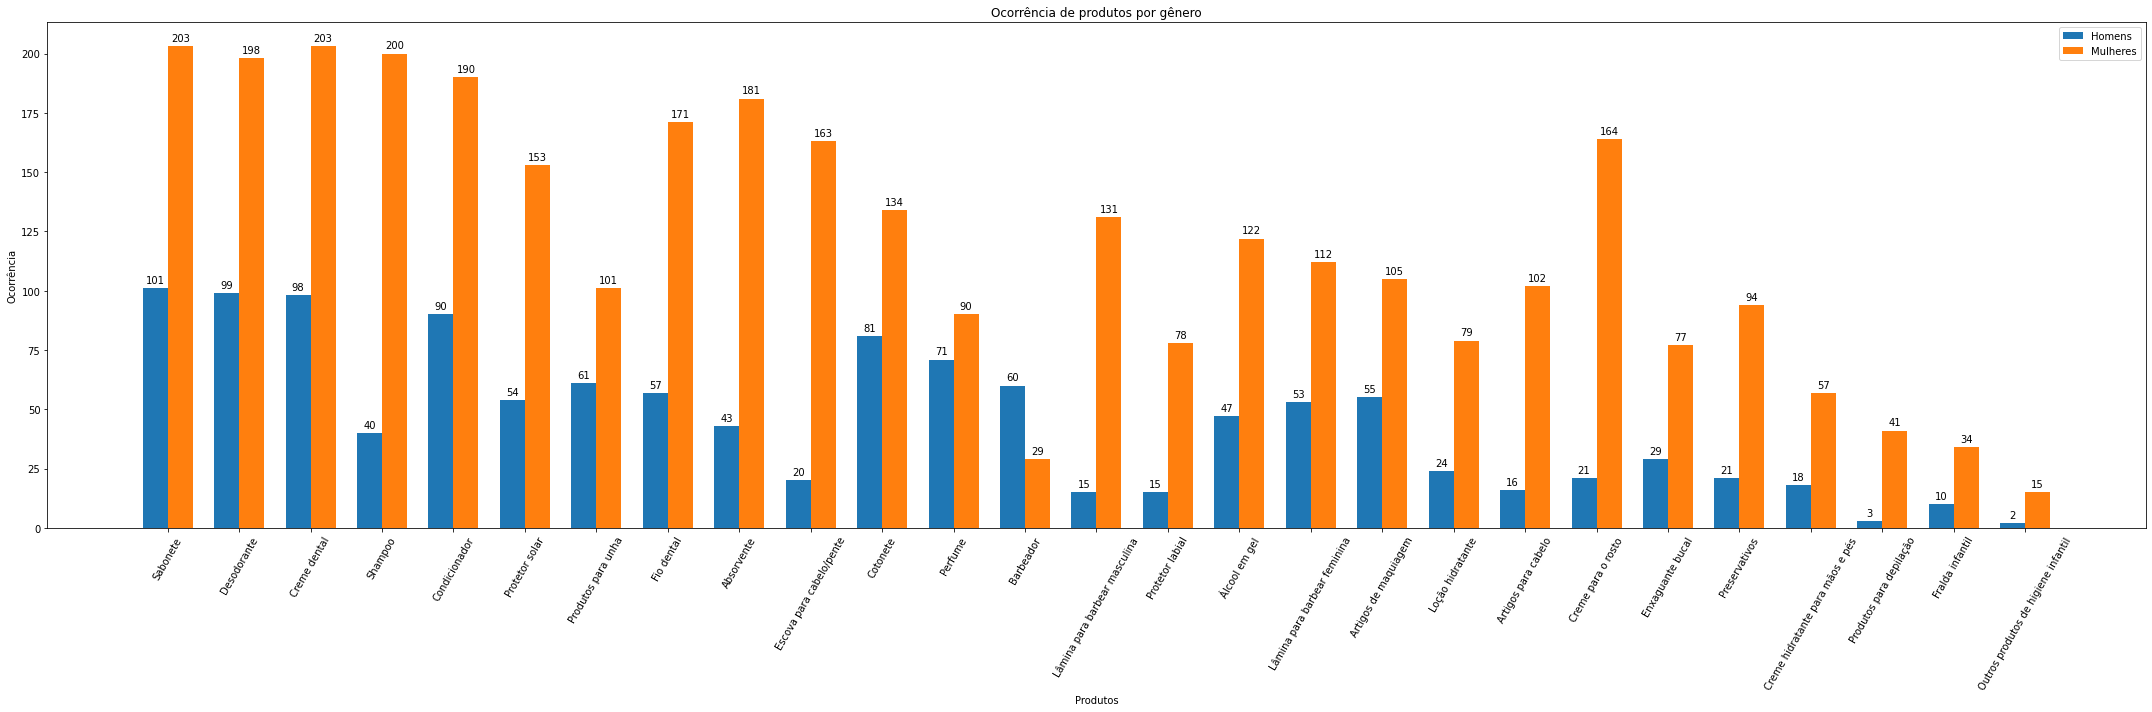



======================================== TOTAL ========================================

1. Sabonete: 305
2. Creme dental: 302
3. Desodorante: 298
4. Shampoo: 291
5. Fio dental: 253
6. Condicionador: 245
7. Álcool em gel: 236
8. Escova para cabelo/pente: 216
9. Absorvente: 203
10. Protetor solar: 197
11. Cotonete: 195
12. Preservativos: 158
13. Loção hidratante: 151
14. Lâmina para barbear feminina: 148
15. Perfume: 131
16. Artigos para cabelo: 128
17. Enxaguante bucal: 127
18. Creme para o rosto: 120
19. Protetor labial: 115
20. Produtos para unha: 112
21. Creme hidratante para mãos e pés: 98
22. Lâmina para barbear masculina: 86
23. Artigos de maquiagem: 80
24. Barbeador: 77
25. Fralda infantil: 65
26. Produtos para depilação: 60
27. Outros produtos de higiene infantil: 52

Total de TOTAL: 305
O produto MAIS comum entre TOTAL foi "Sabonete" com 305 ocorrências, equivalente a 100.0%.
O produto MENOS comum entre TOTAL foi "Outros produtos de higiene infantil" com 52 ocorrências, equi

In [47]:
labels = X
men_means = Y_homens
women_means = Y_mulheres

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width/2, men_means, width, label='Homens')
rects2 = ax.bar(x + width/2, women_means, width, label='Mulheres')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrência')
ax.set_xlabel('Produtos')
ax.set_title('Ocorrência de produtos por gênero')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=60)
plt.margins(0.05)
plt.subplots_adjust(bottom=0.15)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

rankear_produtos('total', ocorrencia_produtos_total, df)
media_idade_e_variacao('todos', idade)

rankear_produtos('homens', ocorrencia_produtos_homens, df_homens)
media_idade_e_variacao('homens', idade_homens)

rankear_produtos('mulheres', ocorrencia_produtos_mulheres, df_mulheres)
media_idade_e_variacao('mulheres', idade_mulheres)




### Por renda

#### Mulheres


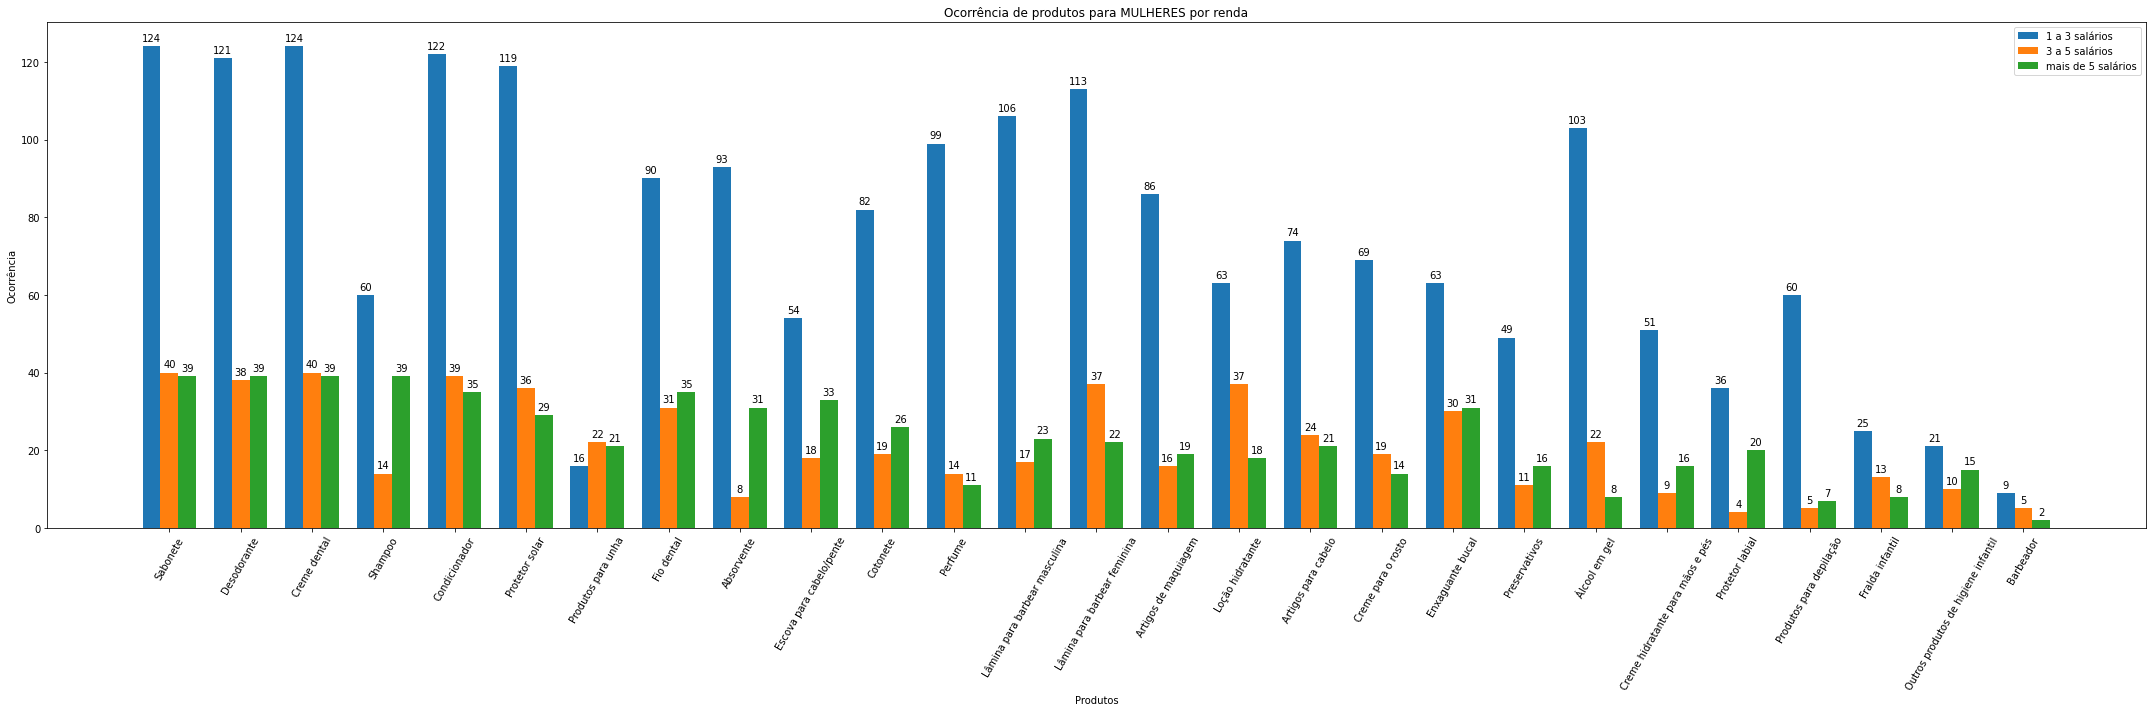



======================================== MULHERES 1A3 ========================================

1. Sabonete: 124
2. Creme dental: 124
3. Shampoo: 122
4. Desodorante: 121
5. Condicionador: 119
6. Absorvente: 113
7. Escova para cabelo/pente: 106
8. Álcool em gel: 103
9. Fio dental: 99
10. Protetor solar: 93
11. Lâmina para barbear feminina: 90
12. Cotonete: 86
13. Loção hidratante: 82
14. Artigos para cabelo: 74
15. Creme para o rosto: 69
16. Protetor labial: 63
17. Produtos para unha: 63
18. Perfume: 60
19. Preservativos: 60
20. Artigos de maquiagem: 54
21. Creme hidratante para mãos e pés: 51
22. Enxaguante bucal: 49
23. Produtos para depilação: 36
24. Fralda infantil: 25
25. Outros produtos de higiene infantil: 21
26. Lâmina para barbear masculina: 16
27. Barbeador: 9

Total de MULHERES 1A3: 124
O produto MAIS comum entre MULHERES 1A3 foi "Sabonete" com 124 ocorrências, equivalente a 100.0%.
O produto MENOS comum entre MULHERES 1A3 foi "Barbeador" com 9 ocorrências, equivalente a 7.

In [48]:
labels = X_mulheres
um_a_tres = Y_mulheres_1a3
tres_a_cinco = Y_mulheres_3a5
cinco = Y_mulheres_5

for i in range(len(X)):
  if len(um_a_tres) <= i:
    um_a_tres.append(0)
  if len(tres_a_cinco) <= i:
    tres_a_cinco.append(0)
  if len(cinco) <= i:
    cinco.append(0)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width, um_a_tres, width, label='1 a 3 salários')
rects2 = ax.bar(x, tres_a_cinco, width, label='3 a 5 salários')
rects3 = ax.bar(x + width, cinco, width, label='mais de 5 salários')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrência')
ax.set_xlabel('Produtos')
ax.set_title('Ocorrência de produtos para MULHERES por renda')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=60)
plt.margins(0.05)
plt.subplots_adjust(bottom=0.15)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


rankear_produtos_por_renda('mulheres 1a3', ocorrencia_produtos_mulheres_renda_1a3, df_mulheres_renda_1a3)
rankear_produtos_por_renda('mulheres 3a5', ocorrencia_produtos_mulheres_renda_3a5, df_mulheres_renda_3a5)
rankear_produtos_por_renda('mulheres 5', ocorrencia_produtos_mulheres_renda_5, df_mulheres_renda_5)




#### Homens

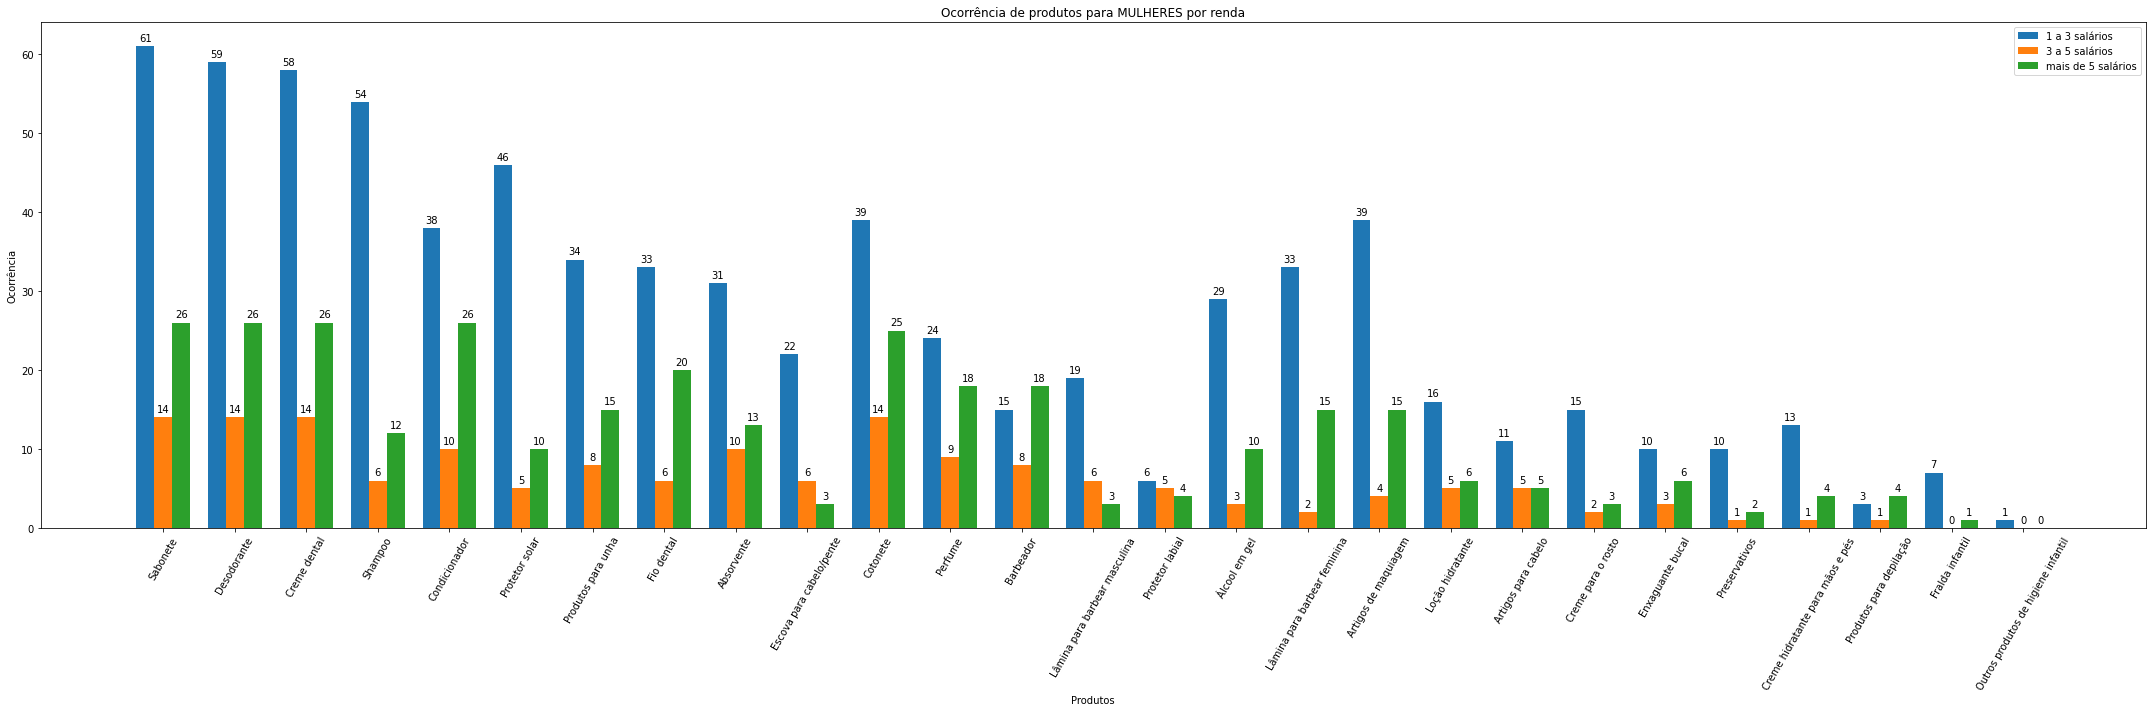



======================================== HOMENS 1A3 ========================================

1. Sabonete: 61
2. Desodorante: 59
3. Creme dental: 58
4. Shampoo: 54
5. Fio dental: 46
6. Condicionador: 39
7. Álcool em gel: 39
8. Barbeador: 38
9. Preservativos: 34
10. Cotonete: 33
11. Escova para cabelo/pente: 33
12. Lâmina para barbear masculina: 31
13. Enxaguante bucal: 29
14. Protetor solar: 24
15. Perfume: 22
16. Loção hidratante: 19
17. Creme hidratante para mãos e pés: 16
18. Protetor labial: 15
19. Absorvente: 15
20. Fralda infantil: 13
21. Outros produtos de higiene infantil: 11
22. Lâmina para barbear feminina: 10
23. Artigos para cabelo: 10
24. Produtos para unha: 7
25. Creme para o rosto: 6
26. Produtos para depilação: 3
27. Artigos de maquiagem: 1

Total de HOMENS 1A3: 61
O produto MAIS comum entre HOMENS 1A3 foi "Sabonete" com 61 ocorrências, equivalente a 100.0%.
O produto MENOS comum entre HOMENS 1A3 foi "Artigos de maquiagem" com 1 ocorrências, equivalente a 1.64%.


===

In [49]:
labels = X
um_a_tres = Y_homens_1a3
tres_a_cinco = Y_homens_3a5
cinco = Y_homens_5

for i in range(len(X)):
  if len(um_a_tres) <= i:
    um_a_tres.append(0)
  if len(tres_a_cinco) <= i:
    tres_a_cinco.append(0)
  if len(cinco) <= i:
    cinco.append(0)


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width, um_a_tres, width, label='1 a 3 salários')
rects2 = ax.bar(x, tres_a_cinco, width, label='3 a 5 salários')
rects3 = ax.bar(x + width, cinco, width, label='mais de 5 salários')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrência')
ax.set_xlabel('Produtos')
ax.set_title('Ocorrência de produtos para MULHERES por renda')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=60)
plt.margins(0.05)
plt.subplots_adjust(bottom=0.15)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

rankear_produtos_por_renda('homens 1a3', ocorrencia_produtos_homens_renda_1a3, df_homens_renda_1a3)
rankear_produtos_por_renda('homens 3a5', ocorrencia_produtos_homens_renda_3a5, df_homens_renda_3a5)
rankear_produtos_por_renda('homens 5', ocorrencia_produtos_homens_renda_5, df_homens_renda_5)

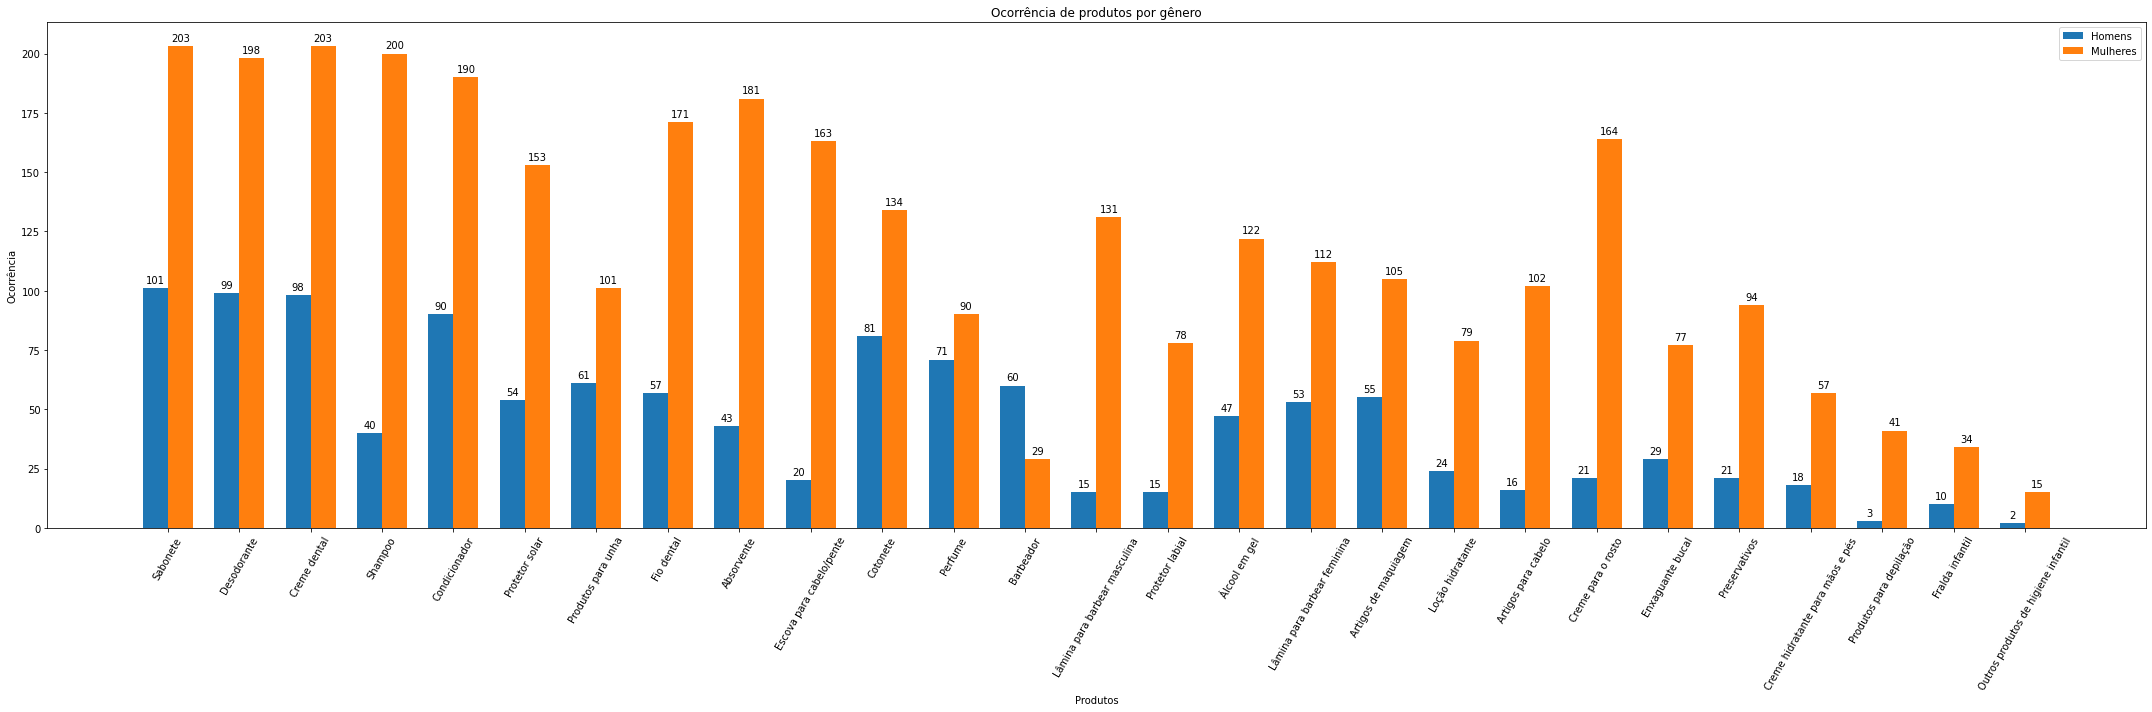

In [50]:
labels = X
men_means = Y_homens
women_means = Y_mulheres

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width/2, men_means, width, label='Homens')
rects2 = ax.bar(x + width/2, women_means, width, label='Mulheres')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrência')
ax.set_xlabel('Produtos')
ax.set_title('Ocorrência de produtos por gênero')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=60)
plt.margins(0.05)
plt.subplots_adjust(bottom=0.15)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


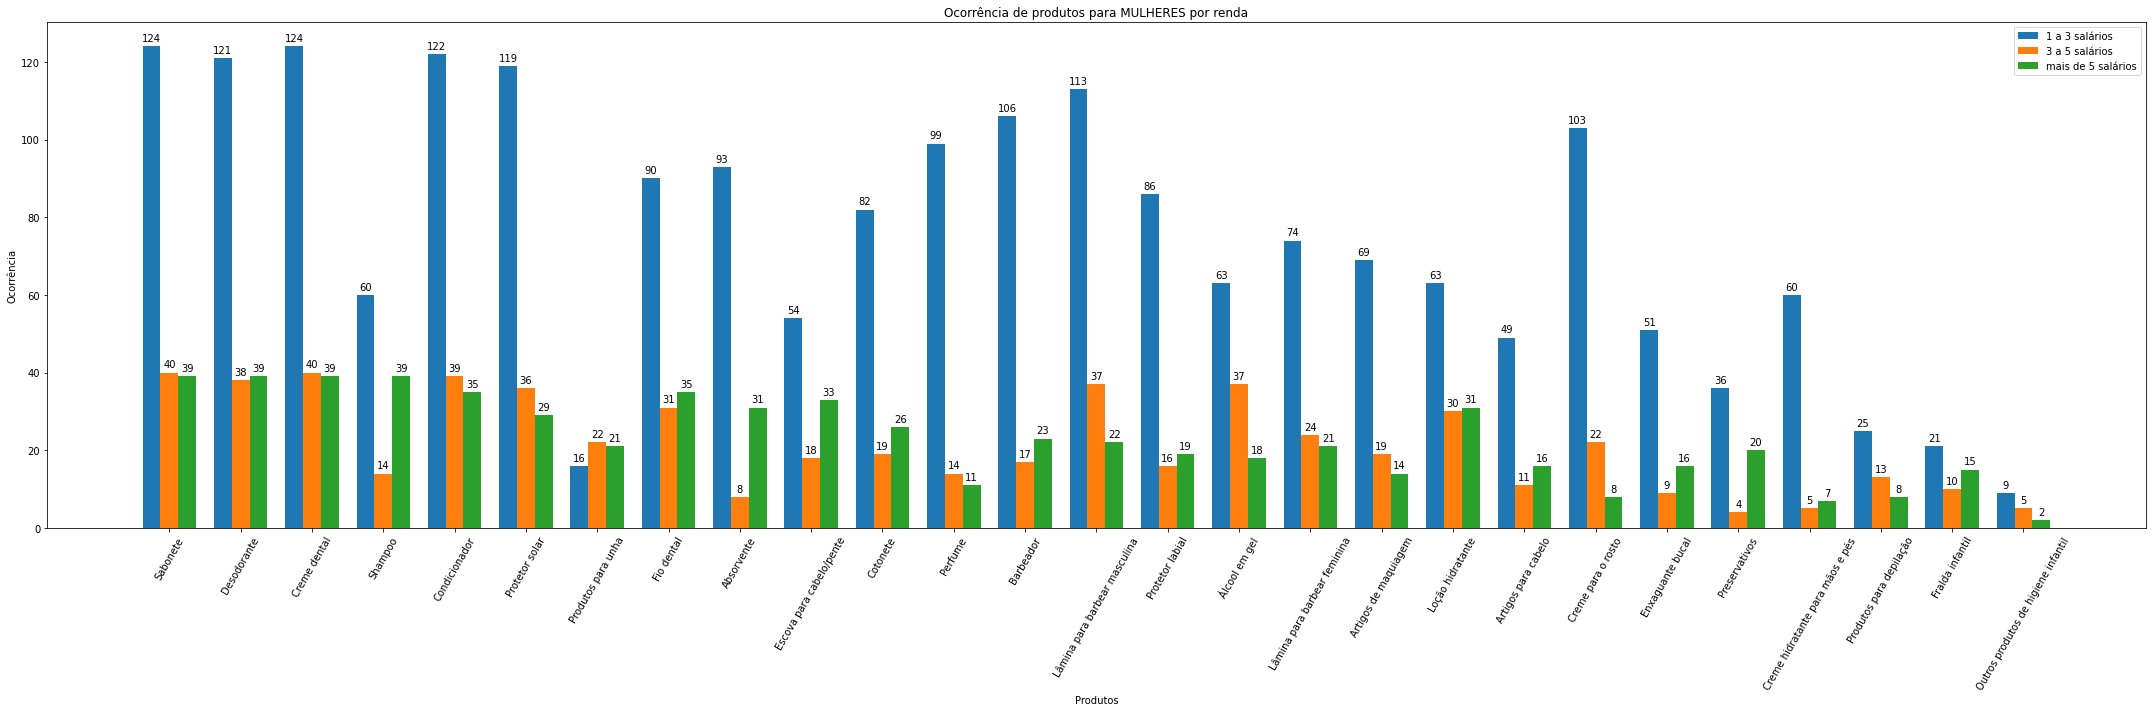

In [51]:
labels = X
um_a_tres = Y_mulheres_1a3
tres_a_cinco = Y_mulheres_3a5
cinco = Y_mulheres_5


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

print(x)

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width, um_a_tres, width, label='1 a 3 salários')
rects2 = ax.bar(x, tres_a_cinco, width, label='3 a 5 salários')
rects3 = ax.bar(x + width, cinco, width, label='mais de 5 salários')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrência')
ax.set_xlabel('Produtos')
ax.set_title('Ocorrência de produtos para MULHERES por renda')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=60)
plt.margins(0.05)
plt.subplots_adjust(bottom=0.15)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()